# <center>SFML/INFO-F422: Statistical foundations of machine learning</center>

# <center>Classification Project</center>

Name: Mathieu Parmentier & Nilson Toula

Python version: 3.6

Date: XXXXX


# Objective and strategy 

## Material and method

Notre méthodologie va consité à comparer, dans un premier temps un data set artificiel avec et sans point abérant sur les différent algorithmes. Cela nous permettra d'attester de leur bon prise en main et de la pertinance de leur résultats. 
Après l'inicialisation, une éventuel optimisation et l'entrainement des models, nous les évaluerons avec différentes statistiques tels que:
 0 Precision
 0 Recall
 0 F1
 0 Support
 ...
Nous avons pris soins dans le data set synthétique de bien équilibré les classes.

Nous reprendrons la meme methodo pour le data set réel.

Fusionnons la partie matériel et method avec objet et strat qu'on appellera introdution

## Influence of the outliers on the models for simple data set without  noise

### Synthetic data set:

In [1]:
import pylab as pl, numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles

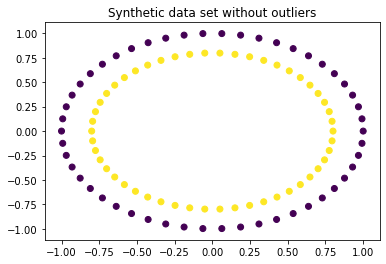

In [2]:
np.random.seed(42)
X,Y = make_circles(n_samples=100, noise=0, factor=0.8)
pl.scatter(X[:, 0], X[:, 1], marker='o', c=Y)
plt.title("Synthetic data set without outliers")
plt.show()

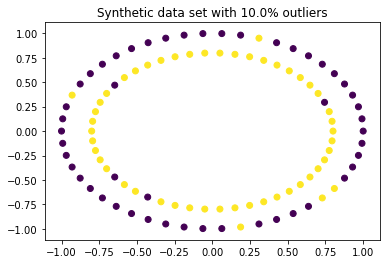

In [3]:
def flip(rate,y):
    number = int(round(len(y)*rate))
    flag = True
    i = 0
    cl_a = 0
    cl_b = 0
    while flag:
        if y[i] == 0 and cl_a != number//2:
            cl_a += 1
            y[i] = 1
        elif y[i] == 1 and cl_b != number//2:
            cl_b += 1
            y[i] = 0
        else:
            flag = False
        i += 1
    outliers = cl_a + cl_b
    return y, outliers


Yo = np.copy(Y)
outlier_rate = 0.1
Yo, outliers = flip(outlier_rate,Yo)
pl.scatter(X[:, 0], X[:, 1], marker='o', c=Yo)
plt.title("Synthetic data set with {}% outliers".format(outlier_rate*100))
plt.show()

Building of the training set and test set

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 25)
xo_train, xo_test, yo_train, yo_test = train_test_split(X, Yo, test_size = .2, random_state = 25)

### 1) Algorithm: Gaussian Naive Bayes

#### a) Introduction
Gaussian Naive Bayes algorithm is a probabilistic-based algorithm.

     Theoretical approach
Let $ \{(x_n, y_n) : x_n \in \mathbb{R}^d, y_n \in \{-1;1\} \} $ be the training set, $n= 1,\dots, N$ . 
The hypothesis space  of the Gaussian Naive Bayes or GNB is: 
   $$\mathcal{H}_{GNB} = \{ h \in \mathcal{H} : h(x) = P(y_n \mid x_n) \}$$
   
   Where $P(y_n \mid x_n)$ is the posterior probability of the well known Bayes Formula:
    
$$P(y \mid x) = \frac{P(y) P(x \mid y)}{P(x)}$$



In this algorithm we assume that the values associated with each class are distributed according to a Gaussian (also called Normal) law:
       $$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$
   Where $\mu$ is the mean of the distribution, $\sigma$ is the standard deviation (nb: $\sigma^2$ is the variance of the distribution).       


                 Learning phase
To compute $P(y_n \mid x_n)$, we need to get the evidence of every data-point $P(x_n)$, then for every class $y_n$ we compute the likelihood of the features in those classes $P(x_{n_i} \mid y_n)$, and the prior probability $P(y_n)$, then we stock those values in a data structure or compute them on the fly since those operations are really simple to compute.

                 Classification phase
For every point we want to test $x_{test}$ , we compute $h(x_{test}) = \operatorname*{arg\,max}_{y_n}( P(y_n \mid x_{test}) )$




     Why do we call it naive?
   This algorithm is said Naive because we assume that our model correctly simulate the real world and that all the attribute is independent (we don't model any of the interrelationship between the attributes).
  But in this case, we are not focusing on what is exactly the probability (we said that GNB is a bad estimator) but the order of that probability, aiming to compare them to one another. So the correctness of $P(y_n \mid x_n)$ does not really matter as long as for every other y': $P(y_n \mid x_n) >> P(y' \mid x_n)$ .
     
     Practical flaw
  Another issue is when we encounter a new attribute combination we have never seen before, we will have $P(x_n \mid y_n) = 0$
  Which will compromise our calculations, to counteract that, we will smooth the our probabilities by initializing any probability to a value different than 0. Doing so is admitting that there is an inductive bias in our data which makes our algorithm "less naive".


<font color="gray"> Sources:</font>
<br><br>
<font color="gray"> Abu-Mostafa, Yaser S., 1957-. (2012). Learning from data : a short course. [United States] :AMLBook.com, </font>
<br><br><font color="gray">Udacity SL6 - Kernel mathods & SVMs: https://www.udacity.com/</font>
<br><br> <font color="gray">Scikit-Learn: https://scikit-learn.org/stable/modules/naive_bayes.html</font>
<br><br> <font color="gray">Zhang, H. (2004). The optimality of naive Bayes. AA, 1(2), 3.</font>
<br><br> <font color="gray">Augmented Startups youtube video: https://youtu.be/CPqOCI0ahss</font>


#### b) Application on a synthetic data set without outliers

##### b.1) Code

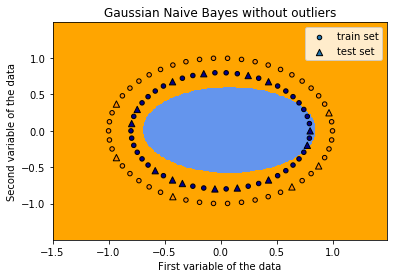

In [5]:
from sklearn.naive_bayes import GaussianNB

# model building
GNB = GaussianNB()
GNB.fit(x_train, y_train)

#Plot part
cmap_area = ListedColormap(['orange', 'cornflowerblue'])
cmap_point = ListedColormap(['darkorange', 'darkblue'])

x_min, x_max = X[:, 0].min() -0.5, X[:, 0].max() +0.5
y_min, y_max = X[:, 1].min() -0.5, X[:, 1].max() +0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
Z = GNB.predict(np.c_[xx.ravel(), yy.ravel()])

## Put area prediction into a color classe
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_area)

## Plot all the data points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor="black", cmap=cmap_point, s=20, label="train set")
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, edgecolor="black",marker = '^', cmap=cmap_point, s=40, label="test set")

plt.xlabel("First variable of the data")
plt.ylabel("Second variable of the data")
plt.title("Gaussian Naive Bayes without outliers")
plt.legend()
plt.show()

##### b.2) Score

In [6]:
#Computation of E in and E out
E_in_GNB = GNB.score(x_train, y_train)
E_out_GNB = GNB.score(x_test, y_test)

#cross validation of the model with cv = 5
cv_scores_GNB = cross_val_score(GNB, X, Y, cv=5)

#print score
print("In-sample error :",E_in_GNB)
print("Out-sample error :",E_out_GNB)
print("cross validation mean score for GNB :",round(np.mean(cv_scores_GNB),4))
print()
print('Classification report:')
print(classification_report(y_test,GNB.predict(x_test)))

In-sample error : 0.6
Out-sample error : 0.4
cross validation mean score for GNB : 0.7

Classification report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         6
           1       1.00      0.14      0.25        14

    accuracy                           0.40        20
   macro avg       0.67      0.57      0.38        20
weighted avg       0.80      0.40      0.33        20



#### c) Application on a synthetic data set with outliers

##### c.1) Code

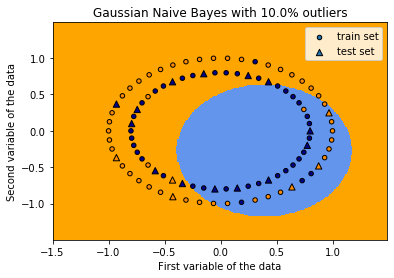

In [7]:
# model building
GNBo = GaussianNB()
GNBo.fit(xo_train, yo_train)


#Plot part
cmap_area = ListedColormap(['orange', 'cornflowerblue'])
cmap_point = ListedColormap(['darkorange', 'darkblue'])

x_min, x_max = X[:, 0].min() -0.5, X[:, 0].max() +0.5
y_min, y_max = X[:, 1].min() -0.5, X[:, 1].max() +0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
Z = GNBo.predict(np.c_[xx.ravel(), yy.ravel()])

## Put area prediction into a color classe
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_area)

## Plot all the data points
plt.scatter(xo_train[:, 0], xo_train[:, 1], c=yo_train, cmap=cmap_point,edgecolor='black', s=20, label="train set")
plt.scatter(xo_test[:,0], xo_test[:,1], c=yo_test, edgecolor="black", cmap=cmap_point,marker = '^', s=40, label="test set")

plt.xlabel("First variable of the data")
plt.ylabel("Second variable of the data")
plt.title("Gaussian Naive Bayes with {}% outliers".format(outlier_rate*100))
plt.legend()
plt.show()

##### c.2) Score

In [8]:
#Computation of E in and E out
E_in_GNBo = GNBo.score(xo_train, yo_train)
E_out_GNBo = GNBo.score(xo_test, yo_test)

#cross validation of the model with cv = 5
cv_scores_GNBo = cross_val_score(GNBo, X, Yo, cv=5)

#print scores
print("In-sample error :",E_in_GNBo)
print("Out-sample error :",E_out_GNBo)
print("cross validation mean score for GNB :",round(np.mean(cv_scores_GNBo),4))
print()
print('Classification report for {}% outliers :'.format(outlier_rate*100))
print(classification_report(yo_test,GNBo.predict(xo_test)))

In-sample error : 0.6375
Out-sample error : 0.4
cross validation mean score for GNB : 0.6

Classification report for 10.0% outliers :
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         6
           1       0.62      0.36      0.45        14

    accuracy                           0.40        20
   macro avg       0.44      0.43      0.39        20
weighted avg       0.51      0.40      0.42        20



### 2) Algorithm: Support vector classifier

#### a) Introduction
Support Vector Machine is an algorithm aiming to create a function maximizing the soft margin between each class for that function to correctly design a classification threshold between classes.
In other words, a support vector machine (SVM) is a combination between a support vector classifier and a non-linear kernel.

     Theoretical approach
Let $ \{(x_n, y_n) : x_n \in \mathbb{R}^d, y_n \in \{-1;1\} \} $ be the training set, $n= 1,\dots, N$ . 
The hypothesis space  of the SVM is: 
   $$\mathcal{H}_{SVM} = \{ h \in \mathcal{H} : h(x) = sign(\langle w, \varphi(x)\rangle_{ \mathcal{H}}  +b) \mid w \in \mathcal{H}, b \in \mathbb{R} \}$$
   
  Where $\varphi(x)$ is the feature function from the input space $\mathcal{X}$ to the feature space $\mathcal{H}$ where we compute the maximum margin separtion. $\varphi(x)$ correspond to the kernel by: $k(x,y) = \langle \varphi(x),\varphi(y) \rangle_\mathcal{H}$
  
  To do so, we are computing high-dimensional relations between the points without actually transforming them to the higher dimensions, we call this method The Kernel Trick, which reduces the amount of computation required for SVM and allow calculating relationship in an infinite dimension space $\mathcal{H}$.
  That computation will be of the form: $ w = \sum_{n=1}^{d} \alpha_n . \varphi(x_n)$, implying:
  
$$ \langle w, \varphi (x_n) \rangle_{\mathcal{H}} = \big\langle \sum_{n=1}^{d} \alpha_n \varphi(x_n), \varphi(x_n) \big\rangle_\mathcal{H} = \sum_{n=1}^d \alpha_n \langle \varphi(x_n) , \varphi(x_n) \rangle_\mathcal{H} = \sum_{n=1}^d \alpha_n k(x_n, x_n) $$

Thus, we can only consider $\mathcal{H}_{SVM}^X \subset \mathcal{H}_{SVM}$ as our hypothesis space:
$$ \mathcal{H}_{SVM}^X = \big\{h \in \mathcal{H}: h(x) = sign\big( \sum_{n=1}^d ( \alpha_n k(x_n, x_n)) +b \big) \mid \alpha \in \mathbb{R}^d, b\in \mathbb{R} \big\}$$

We will call support vector with $\alpha_i \neq 0 $ .


       Learning phase
To find the best support vector, we use cross-validation to iterate:

First, we compute the relation between data-point into a higher dimension using the kernel trick.
Then, we find a support vector classifier that separates the higher dimensional data into two groups an use it as a threshold.


        Classification phase
We classify any new points according to feature-threshold we compute previously during the learning phase.


<font color="gray"> Sources:</font>
<br><br><font color="gray"> Abu-Mostafa, Yaser S., 1957-. (2012). Learning from data : a short course. [United States] :AMLBook.com, </font>
<br><br><font color="gray"> Space reductionn demonstration by Dougal: https://stats.stackexchange.com/users/9964/dougal  </font>
<br><br><font color="gray">StatQuest with Josh Starmer: https://youtu.be/efR1C6CvhmE  , based on Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. (2013). An introduction to statistical learning : with applications in R. New York :Springer, chap 9.1 to 9.4 </font>



#### b) Application on a synthetic data set without outliers

##### b.1) Code

The optimize settings are {'C': 10, 'kernel': 'rbf'}


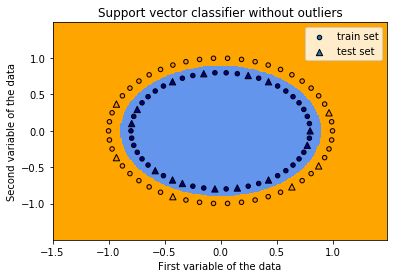

In [9]:
from sklearn.svm import SVC


# model building
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
## Where C is Regularization parameter
svc_opt = GridSearchCV(SVC(), param_grid, cv=5, verbose=0)
svc_opt.fit(x_train, y_train)
print('The optimize settings are',svc_opt.best_params_)
svc_opt = SVC(C = svc_opt.best_params_['C'],kernel = svc_opt.best_params_['kernel'])
svc_opt.fit(x_train, y_train)

#Plot part
cmap_area = ListedColormap(['orange', 'cornflowerblue'])
cmap_point = ListedColormap(['darkorange', 'darkblue'])

x_min, x_max = X[:, 0].min() -0.5, X[:, 0].max() +0.5
y_min, y_max = X[:, 1].min() -0.5, X[:, 1].max() +0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
Z = svc_opt.predict(np.c_[xx.ravel(), yy.ravel()])

## Put area prediction into a color classe
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_area)

## Plot all the data points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor="black", cmap=cmap_point, s=20, label="train set")
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, edgecolor="black",marker = '^', cmap=cmap_point, s=40, label="test set")

plt.xlabel("First variable of the data")
plt.ylabel("Second variable of the data")
plt.title("Support vector classifier without outliers")
plt.legend()
plt.show()

##### b.2) Score

In [10]:
#Computation of E in and E out
E_in_svc_opt = svc_opt.score(x_train, y_train)
E_out_svc_opt = svc_opt.score(x_test, y_test)

#cross validation of the model with cv = 5
cv_scores_svc = cross_val_score(svc_opt, X, Y, cv=5)

#print scores
print("In-sample error :",E_in_svc_opt)
print("Out-sample error :",E_out_svc_opt)
print("cross validation mean score for svc :",round(np.mean(cv_scores_svc),4))
print()
print('Classification report:')
print(classification_report(y_test,svc_opt.predict(x_test)))

In-sample error : 1.0
Out-sample error : 1.0
cross validation mean score for svc : 1.0

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



#### c) Application on a synthetic data set with outliers

##### c.1) Code

The optimize settings are {'C': 10, 'kernel': 'rbf'}


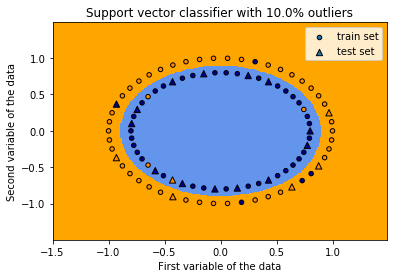

In [11]:
# model building
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
## Where C is Regularization parameter
svc_opto = GridSearchCV(SVC(), param_grid, cv=5, verbose=0)
svc_opto.fit(xo_train, yo_train)
print('The optimize settings are',svc_opto.best_params_)
svc_opto = SVC(C = svc_opto.best_params_['C'],kernel = svc_opto.best_params_['kernel'])
svc_opto.fit(xo_train, yo_train)

#Plot part
cmap_area = ListedColormap(['orange', 'cornflowerblue'])
cmap_point = ListedColormap(['darkorange', 'darkblue'])

x_min, x_max = X[:, 0].min() -0.5, X[:, 0].max() +0.5
y_min, y_max = X[:, 1].min() -0.5, X[:, 1].max() +0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
Z = svc_opto.predict(np.c_[xx.ravel(), yy.ravel()])

## Put area prediction into a color classe
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_area)

## Plot all the data points
plt.scatter(xo_train[:, 0], xo_train[:, 1], c=yo_train, edgecolor="black", cmap=cmap_point, s=20, label="train set")
plt.scatter(xo_test[:,0], xo_test[:,1], c=yo_test, edgecolor="black",marker = '^', cmap=cmap_point, s=40, label="test set")

plt.xlabel("First variable of the data")
plt.ylabel("Second variable of the data")
plt.title("Support vector classifier with {}% outliers".format(outlier_rate*100))
plt.legend()
plt.show()

##### c.2) Score

In [12]:
#Computation of E in and E out
E_in_svc_opto = svc_opto.score(xo_train, yo_train)
E_out_svc_opto = svc_opto.score(xo_test, yo_test)

#cross validation of the model with cv = 5
cv_scores_svco = cross_val_score(svc_opto, X, Yo, cv=5)

#print scores
print("In-sample error :",E_in_svc_opto)
print("Out-sample error :",E_out_svc_opto)
print("cross validation mean score for svc :",round(np.mean(cv_scores_svco),4))
print()
print('Classification report for {}% outliers :'.format(outlier_rate*100))
print(classification_report(yo_test,svc_opto.predict(xo_test)))

In-sample error : 0.9125
Out-sample error : 0.9
cross validation mean score for svc : 0.91

Classification report for 10.0% outliers :
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.93      0.93      0.93        14

    accuracy                           0.90        20
   macro avg       0.88      0.88      0.88        20
weighted avg       0.90      0.90      0.90        20



### 3) Algorithm: Nearest Neighbors Classification

#### a) Introduction 

k-Nearest Neighbors is a lazy algorithm that can be used for either classification or regression. Here we will talk about the classification version.

The K nearest neighbor algorithm never builds an explicit hypothesis, how the algorithm will behave depending on the similarities (or distance) function chosen for the evaluation of any feature and the value of k.
Although, given a training set we can determine the implicit function that is computed.
  

     I.Theoretical approach with k=1   
   
Let $ S = \{(x_n, y_n) : x_n \in \mathbb{R}^d, y_n \in \{-1;1\} \} $ be the training set, $n= 1,\dots, N$ .  

 * For any $x_n$ in the training set, let $d(x_i)_{x_n}$ be a similarity function (or distance) between $x_n$ and $x_i$
 
 Then a Voronoi cell will be an area $A_n$ containing only one element of the training set such that: $\forall x_i \in (x_i, y_i): a \in A_n \iff d(a)_{x_n} = min(d(a)_{x_i} $


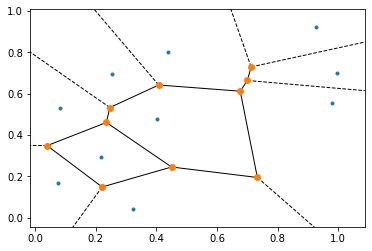

In [13]:
# Exemple of Voronoi cells
points = np.random.rand(10,2)

from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)

plt.show()

                   1.Learning phase 
We compute every Voronoi cell $A_n$, then save the corresponding Voronoi diagram (i.e. we save the bondaries of $A_{y_n} := \bigcup_{x \in S} A_{x_i}, \forall i \in I: y_i = y_n $ ).

                    2.Classification phase 

We assign to any new data-point $x_{new}$ a value corresponding to the $A_{y_n}$ it's included in.



        Generalization for any k
 
  For the smallest $l \geq k$ possible, we assign $y_{new}$ according to a voting method $ y_i$ for all $l$-closest neighbors of $x_{new}$ (e.i. $ \forall i \in I: \nexists k, d(x_{new})_{x_i} \leq d(x_{new})_{x_k} $, and $ \mid I \mid = l$ ).
 
                     Alternative
  Most of the time we use plurality voting as a voting method, but we can also use weighted votes where for example weights of the votes can be liked to the distance or can be affected regarding the cardinal of there class.
   
   The similarity function also plays a huge role in the output (especially in regression), and figuring out the best overall similarity function for any data-set can be really computation intensive.
   
   Also the choice of $k$ can't be too large compared to the number of points $n$

<font color="gray"> Sources:</font>
<br><br><font color="gray"> University of Utah - Machine learning course  </font>
<br><br><font color="gray"> StatQuest with josh Stamer: https://youtu.be/HVXime0nQeI  </font>
<br><br><font color="gray"> Udacty, SL4 - Intance based learning https://www.udacity.com/ </font>

#### b) Application on a synthetic data set without outliers

##### b.1) Code

The optimize settings are {'leaf_size': 2, 'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}


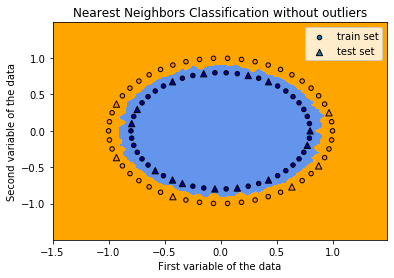

In [14]:
from sklearn import neighbors


# model building
param_grid = {"n_neighbors": [2,3,4,5,6,7,8,9],"leaf_size": [2,5,10,20,30,50,100], "weights": ["uniform", "distance"], "metric": ["euclidean", "manhattan"]}
knn_opt = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid, cv=5, verbose=0)
knn_opt.fit(x_train, y_train)
print('The optimize settings are',knn_opt.best_params_)
knn_opt = neighbors.KNeighborsClassifier(n_neighbors = knn_opt.best_params_['n_neighbors'],leaf_size = knn_opt.best_params_['leaf_size'],weights = knn_opt.best_params_['weights'],metric = knn_opt.best_params_['metric'])
knn_opt.fit(x_train, y_train)

#Plot part
cmap_area = ListedColormap(['orange', 'cornflowerblue'])
cmap_point = ListedColormap(['darkorange', 'darkblue'])

x_min, x_max = X[:, 0].min() -0.5, X[:, 0].max() +0.5
y_min, y_max = X[:, 1].min() -0.5, X[:, 1].max() +0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
Z = knn_opt.predict(np.c_[xx.ravel(), yy.ravel()])

## Put area prediction into a color classe
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_area)

## Plot all the data points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor="black", cmap=cmap_point, s=20, label="train set")
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, edgecolor="black",marker = '^', cmap=cmap_point, s=40, label="test set")

plt.xlabel("First variable of the data")
plt.ylabel("Second variable of the data")
plt.title("Nearest Neighbors Classification without outliers")
plt.legend()
plt.show()

##### b.2) Score

In [15]:
#Computation of E in and E out
E_in_knn_opt = knn_opt.score(x_train, y_train)
E_out_knn_opt = knn_opt.score(x_test, y_test)

#cross validation of the model with cv = 5
cv_scores_knn_opt = cross_val_score(knn_opt, X, Y, cv=5)

#print scores
print("In-sample error :",E_in_knn_opt)
print("Out-sample error :",E_out_knn_opt)
print("cross validation mean score for svc :",round(np.mean(cv_scores_knn_opt),4))
print()
print('Classification report:')
knn_opt_ypred = knn_opt.predict(x_test)
knn_opt_ypred = knn_opt_ypred > 0.5
print(classification_report(y_test,knn_opt_ypred))

In-sample error : 1.0
Out-sample error : 1.0
cross validation mean score for svc : 0.99

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



#### c) Application on a synthetic data set with outliers

##### c.1) Code

The optimize settings are {'leaf_size': 2, 'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}


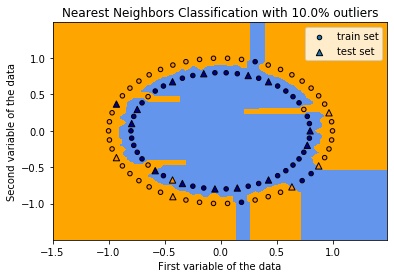

In [16]:
# model building
param_grid = {"n_neighbors": [2,3,4,5,6,7,8,9],"leaf_size": [2,5,10,20,30,50,100], "weights": ["uniform", "distance"], "metric": ["euclidean", "manhattan"]}
knn_opto = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid, cv=5, verbose=0)
knn_opto.fit(xo_train, yo_train)
print('The optimize settings are',knn_opto.best_params_)
knn_opto = neighbors.KNeighborsClassifier(n_neighbors = knn_opto.best_params_['n_neighbors'],leaf_size = knn_opto.best_params_['leaf_size'],weights = knn_opto.best_params_['weights'],metric = knn_opto.best_params_['metric'])
knn_opto.fit(xo_train, yo_train)

#Plot part
cmap_area = ListedColormap(['orange', 'cornflowerblue'])
cmap_point = ListedColormap(['darkorange', 'darkblue'])

x_min, x_max = X[:, 0].min() -0.5, X[:, 0].max() +0.5
y_min, y_max = X[:, 1].min() -0.5, X[:, 1].max() +0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
Z = knn_opto.predict(np.c_[xx.ravel(), yy.ravel()])

## Put area prediction into a color classe
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_area)

## Plot all the data points
plt.scatter(xo_train[:, 0], xo_train[:, 1], c=yo_train, edgecolor="black", cmap=cmap_point, s=20, label="train set")
plt.scatter(xo_test[:,0], xo_test[:,1], c=yo_test, edgecolor="black",marker = '^', cmap=cmap_point, s=40, label="test set")

plt.xlabel("First variable of the data")
plt.ylabel("Second variable of the data")
plt.title("Nearest Neighbors Classification with {}% outliers".format(outlier_rate*100))
plt.legend()
plt.show()

##### c.2) Score

In [17]:
#Computation of E in and E out
E_in_knn_opto = knn_opto.score(xo_train, yo_train)
E_out_knn_opto = knn_opto.score(xo_test, yo_test)

#cross validation of the model with cv = 5
cv_scores_knn_opto = cross_val_score(knn_opto, X, Yo, cv=5)

#print scores
print("In-sample error :",E_in_knn_opto)
print("Out-sample error :",E_out_knn_opto)
print("cross validation mean score for svc :",round(np.mean(cv_scores_knn_opto),4))
print()
print('Classification report for {}% outliers :'.format(outlier_rate*100))
knn_opto_ypred = knn_opto.predict(xo_test)
knn_opto_ypred = knn_opto_ypred > 0.5
print(classification_report(yo_test,knn_opto_ypred))

In-sample error : 1.0
Out-sample error : 0.85
cross validation mean score for svc : 0.82

Classification report for 10.0% outliers :
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20



### 4) Algorithm: Random Forest Classifier


#### a) Introduction 


A random forest is a set of decision trees all trained on a bootstrapping of the training set and aggregating their results (i.e. it's a bagging method).

  

     Theoretical approach 

Let $ S = \{(x_n, y_n) : x_n \in \mathbb{R}^d, y_n \in \{-1;1\} \} $ be the training set, $n= 1,\dots, N$.



      Learning phase 
      
From $S$, we extract $M>0 \in \mathbb{N} $ bootstraped set $S_m$ each composed of $a_m \in \{1,..., n\}$ data points from $S$.
For every $S_m$ we grow a tree $T_m : x \in \mathbb{R}^d \rightarrow \{-1;1\}$ by only considering a random number of variables at each step.

Then we iterate those steps several times changing the number of variables considered and use out of bag values to determine the most accurate architecture.

        Classification phase 

For any new point $x_{new}$ we determine $y_{new}$ by a voting method (most of the time we use $y_{new} = \operatorname*{arg\,max}_{y_n}( T(x_{new}))$ for classification problems)
  

<font color="gray"> Sources:</font>
<br><br><font color="gray"> Biau, G., & Scornet, E. (2016). A random forest guided tour. TEST, 25(2), 197–227. https://doi.org/10.1007/s11749-016-0481-7  </font>
<br><br><font color="gray"> StatQuest with josh Stamer: https://youtu.be/J4Wdy0Wc_xQ </font>


#### b) Application on a synthetic data set without outliers

##### b.1) Code

In [60]:
from sklearn.ensemble import RandomForestClassifier


# model building
param_grid = {'criterion': ['entropy', 'gini'],'max_depth': [2, 3, 5, 10],'min_samples_split': [2, 3, 5],'min_samples_leaf': [1, 5, 8]}
RFC_opt = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=0)
RFC_opt.fit(x_train, y_train)
print('The optimize settings are',RFC_opt.best_params_)
RFC_opt = RandomForestClassifier(criterion = RFC_opt.best_params_['criterion'],max_depth = RFC_opt.best_params_['max_depth'],min_samples_split = RFC_opt.best_params_['min_samples_split'],min_samples_leaf = RFC_opt.best_params_['min_samples_leaf'])
RFC_opt.fit(x_train, y_train)

#Plot part
cmap_area = ListedColormap(['orange', 'cornflowerblue'])
cmap_point = ListedColormap(['darkorange', 'darkblue'])

x_min, x_max = X[:, 0].min() -0.5, X[:, 0].max() +0.5
y_min, y_max = X[:, 1].min() -0.5, X[:, 1].max() +0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
Z = RFC_opt.predict(np.c_[xx.ravel(), yy.ravel()])

## Put area prediction into a color classe
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_area)

## Plot all the data points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor="black", cmap=cmap_point, s=20, label="train set")
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, edgecolor="black",marker = '^', cmap=cmap_point, s=40, label="test set")

plt.xlabel("First variable of the data")
plt.ylabel("Second variable of the data")
plt.title("Random Forest Classifier without outliers")
plt.legend()
plt.show()

KeyboardInterrupt: 

##### b.2) Score

In [19]:
#Computation of E in and E out
E_in_RFC_opt = RFC_opt.score(x_train, y_train)
E_out_RFC_opt = RFC_opt.score(x_test, y_test)

#cross validation of the model with cv = 5
cv_scores_RFC_opt = cross_val_score(RFC_opt, X, Y, cv=5)

#print scores
print("In-sample error :",E_in_RFC_opt)
print("Out-sample error :",E_out_RFC_opt)
print("cross validation mean score for svc :",round(np.mean(cv_scores_RFC_opt),4))
print()
print('Classification report:')
print(classification_report(y_test,RFC_opt.predict(x_test)))

In-sample error : 0.9125
Out-sample error : 0.95
cross validation mean score for svc : 0.9

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.93      1.00      0.97        14

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



#### c) Application on a synthetic data set with outliers

##### c.1) Code

The optimize settings are {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


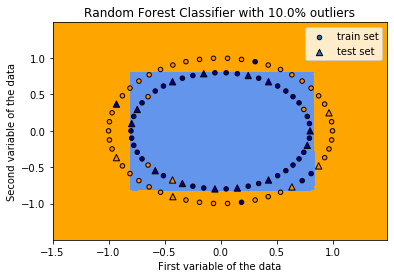

In [20]:
# model building
param_grid = {'criterion': ['entropy', 'gini'],'max_depth': [2, 3, 5, 10],'min_samples_split': [2, 3, 5],'min_samples_leaf': [1, 5, 8]}
RFC_opto = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=0)
RFC_opto.fit(xo_train, yo_train)
print('The optimize settings are',RFC_opto.best_params_)
RFC_opto = RandomForestClassifier(criterion = RFC_opto.best_params_['criterion'],max_depth = RFC_opto.best_params_['max_depth'],min_samples_split = RFC_opto.best_params_['min_samples_split'],min_samples_leaf = RFC_opto.best_params_['min_samples_leaf'])
RFC_opto.fit(xo_train, yo_train)

#Plot part
cmap_area = ListedColormap(['orange', 'cornflowerblue'])
cmap_point = ListedColormap(['darkorange', 'darkblue'])

x_min, x_max = X[:, 0].min() -0.5, X[:, 0].max() +0.5
y_min, y_max = X[:, 1].min() -0.5, X[:, 1].max() +0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
Z = RFC_opto.predict(np.c_[xx.ravel(), yy.ravel()])

## Put area prediction into a color classe
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_area)

## Plot all the data points
plt.scatter(xo_train[:, 0], xo_train[:, 1], c=yo_train, edgecolor="black", cmap=cmap_point, s=20, label="train set")
plt.scatter(xo_test[:,0], xo_test[:,1], c=yo_test, edgecolor="black",marker = '^', cmap=cmap_point, s=40, label="test set")

plt.xlabel("First variable of the data")
plt.ylabel("Second variable of the data")
plt.title("Random Forest Classifier with {}% outliers".format(outlier_rate*100))
plt.legend()
plt.show()

##### c.2) Score

In [21]:
#Computation of E in and E out
E_in_RFC_opto = RFC_opto.score(xo_train, yo_train)
E_out_RFC_opto = RFC_opto.score(xo_test, yo_test)

#cross validation of the model with cv = 5
cv_scores_RFC_opto = cross_val_score(RFC_opto, X, Yo, cv=5)

#print scores
print("In-sample error :",E_in_RFC_opto)
print("Out-sample error :",E_out_RFC_opto)
print("cross validation mean score for svc :",round(np.mean(cv_scores_RFC_opto),4))
print()
print('Classification report for {}% outliers'.format(outlier_rate*100))
print(classification_report(yo_test,RFC_opto.predict(xo_test)))

In-sample error : 0.85
Out-sample error : 0.85
cross validation mean score for svc : 0.78

Classification report for 10.0% outliers
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.87      0.93      0.90        14

    accuracy                           0.85        20
   macro avg       0.83      0.80      0.81        20
weighted avg       0.85      0.85      0.85        20



## Influence of the outliers on the models for data set with a slight noise

### Synthetic data with a slight noise

we generate our new data in the same way as before (in the form of 2 concentric circles) except that we add 10% noise.  

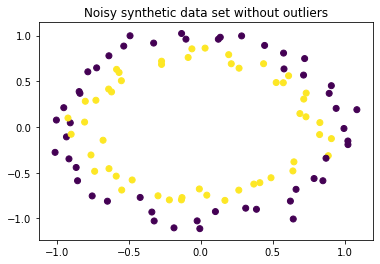

In [27]:
Xn,Yn = make_circles(n_samples=100, noise=0.06, factor=0.8)
pl.scatter(Xn[:, 0], Xn[:, 1], marker='o', c=Yn)
plt.title("Noisy synthetic data set without outliers")
plt.show()

We add class annotation errors to the data set

In [54]:
from sklearn.linear_model import Perceptron


def measure(outlier_rate,model,Xn,Yn):
    Yno = np.copy(Yn)
    Yno, outliers = flip(outlier_rate,Yno)
    xno_train, xno_test, yno_train, yno_test = train_test_split(Xn, Yno, test_size = .2, random_state = 25)
    model.fit(xno_train,yno_train)
    ynpred = model.predict(xno_test)
    ynpred = ynpred > 0.5
    report = classification_report(yno_test,ynpred,output_dict=True)
    report0 = report['0']
    report1 = report['1']
    return report0,report1
   

def measure_design(outlier_rate,Xn,Yn):
    models = [per,GNB,svc_opt,knn_opt, RFC_opt]
    precision0 = []
    precision1 = []
    recall0 = []
    recall1 = []
    fscore0 = []
    fscore1 = []
    support0 = []
    support1 = []
    for model in models:
        report0,report1 = measure(outlier_rate,model,Xn,Yn)
        precision0.append(report0['precision'])
        recall0.append(report0['recall'])
        fscore0.append(report0['f1-score'])
        support0.append(report0['support'])
        precision1.append(report1['precision'])
        recall1.append(report1['recall'])
        fscore1.append(report1['f1-score'])
        support1.append(report1['support'])
    clas_report = [precision0,precision1,recall0,recall1,fscore0,fscore1,support0,support1]
    clas_report = np.array(clas_report)
    return clas_report

per = Perceptron()
models_label = ['Perceptron','GNB','SVC','knn', 'RFC']
error_label = ['precision','recall','f1-score','support']

In [29]:
outlier_rate = 0.05
header = models_label
table = measure_design(outlier_rate,Xn,Yn)
index = [error_label[i//2]+' '+str(i%2)  for i in range(8)]
print()
print("Classification report for {}% outliers".format(outlier_rate*100))
pd.DataFrame(table, columns = header,index = index)


Classification report for 5.0% outliers


,Perceptron,GNB,SVC,knn,RFC
precision 0,0.500000,0.461538,0.909091,0.800000,0.833333
precision 1,0.416667,0.285714,0.888889,0.700000,0.571429
recall 0,0.363636,0.545455,0.909091,0.727273,0.454545
recall 1,0.555556,0.222222,0.888889,0.777778,0.888889
f1-score 0,0.421053,0.500000,0.909091,0.761905,0.588235
f1-score 1,0.476190,0.250000,0.888889,0.736842,0.695652
support 0,11.000000,11.000000,11.000000,11.000000,11.000000
support 1,9.000000,9.000000,9.000000,9.000000,9.000000


In [30]:
outlier_rate = 0.1
header = models_label
table = measure_design(outlier_rate,Xn,Yn)
index = [error_label[i//2]+' '+str(i%2)  for i in range(8)]
print()
print("Classification report for {}% outliers".format(outlier_rate*100))
pd.DataFrame(table, columns = header,index = index)


Classification report for 10.0% outliers


,Perceptron,GNB,SVC,knn,RFC
precision 0,0.500000,0.384615,0.750000,0.727273,0.625000
precision 1,0.428571,0.142857,0.750000,0.666667,0.500000
recall 0,0.272727,0.454545,0.818182,0.727273,0.454545
recall 1,0.666667,0.111111,0.666667,0.666667,0.666667
f1-score 0,0.352941,0.416667,0.782609,0.727273,0.526316
f1-score 1,0.521739,0.125000,0.705882,0.666667,0.571429
support 0,11.000000,11.000000,11.000000,11.000000,11.000000
support 1,9.000000,9.000000,9.000000,9.000000,9.000000


In [31]:
outlier_rate = 0.2
header = models_label
table = measure_design(outlier_rate,Xn,Yn)
index = [error_label[i//2]+' '+str(i%2)  for i in range(8)]
print()
print("Classification report for {}% outliers".format(outlier_rate*100))
pd.DataFrame(table, columns = header,index = index)


Classification report for 20.0% outliers


,Perceptron,GNB,SVC,knn,RFC
precision 0,0.562500,0.444444,0.666667,0.700000,0.555556
precision 1,0.250000,0.272727,0.454545,0.500000,0.363636
recall 0,0.750000,0.333333,0.500000,0.583333,0.416667
recall 1,0.125000,0.375000,0.625000,0.625000,0.500000
f1-score 0,0.642857,0.380952,0.571429,0.636364,0.476190
f1-score 1,0.166667,0.315789,0.526316,0.555556,0.421053
support 0,12.000000,12.000000,12.000000,12.000000,12.000000
support 1,8.000000,8.000000,8.000000,8.000000,8.000000


In [32]:
outlier_rate = 0.3
header = models_label
table = measure_design(outlier_rate,Xn,Yn)
index = [error_label[i//2]+' '+str(i%2)  for i in range(8)]
print()
print("Classification report for {}% outliers".format(outlier_rate*100))
pd.DataFrame(table, columns = header,index = index)


Classification report for 30.0% outliers


,Perceptron,GNB,SVC,knn,RFC
precision 0,0.666667,0.750000,0.750000,0.636364,0.444444
precision 1,0.375000,0.375000,0.416667,0.333333,0.181818
recall 0,0.615385,0.230769,0.461538,0.538462,0.307692
recall 1,0.428571,0.857143,0.714286,0.428571,0.285714
f1-score 0,0.640000,0.352941,0.571429,0.583333,0.363636
f1-score 1,0.400000,0.521739,0.526316,0.375000,0.222222
support 0,13.000000,13.000000,13.000000,13.000000,13.000000
support 1,7.000000,7.000000,7.000000,7.000000,7.000000


## Influence of the outliers on real data set

In [33]:
data = pd.read_csv('datasets_619175_1118179_housing_in_london_monthly_variables.csv')
data = data.dropna()

print("The data's dimension are", data.shape)
print('The features of the data are: ', list(data.columns))

The data's dimension are (7375, 7)
The features of the data are:  ['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes', 'borough_flag']


In [45]:
column_unique_value={}
for i in data.columns:
   column_unique_value[i] = len(data[i].unique())
   
import pprint
pprint.pprint(column_unique_value)

{'area': 33,
 'average_price': 7312,
 'borough_flag': 1,
 'code': 33,
 'date': 227,
 'houses_sold': 729,
 'no_of_crimes': 2658}


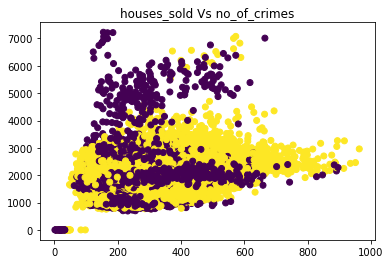

In [52]:
Yr = np.where( data['average_price'] < np.mean(data['average_price']), 1, 0)
Xr = data[['houses_sold', 'no_of_crimes']]
Xr = np.array(Xr)
pl.scatter(Xr[:, 0], Xr[:, 1], marker='o', c=Yr)
plt.title("houses_sold Vs no_of_crimes")
plt.show()

### Score of our models on real data set without outliers

In [55]:
outlier_rate = 0
header = models_label
table = measure_design(outlier_rate,Xr,Yr)
index = [error_label[i//2]+' '+str(i%2)  for i in range(8)]
print()
print("Classification report for {}% outliers".format(outlier_rate*100))
pd.DataFrame(table, columns = header,index = index)


Classification report for 0% outliers


,Perceptron,GNB,SVC,knn,RFC
precision 0,0.473062,0.531250,0.866667,0.527629,0.654255
precision 1,0.725490,0.646142,0.638462,0.715536,0.663559
recall 0,0.647482,0.183453,0.070144,0.532374,0.221223
recall 1,0.563656,0.902067,0.993471,0.711643,0.929271
f1-score 0,0.546697,0.272727,0.129784,0.529991,0.330645
f1-score 1,0.634415,0.752952,0.777352,0.713584,0.774252
support 0,556.000000,556.000000,556.000000,556.000000,556.000000
support 1,919.000000,919.000000,919.000000,919.000000,919.000000


### Score of our models on real data set with outliers

In [57]:
outlier_rate = 0.05
header = models_label
table = measure_design(outlier_rate,Xr,Yr)
index = [error_label[i//2]+' '+str(i%2)  for i in range(8)]
print()
print("Classification report for {}% outliers".format(outlier_rate*100))
pd.DataFrame(table, columns = header,index = index)


Classification report for 5.0% outliers


,Perceptron,GNB,SVC,knn,RFC
precision 0,0.521097,0.523026,0.774648,0.547945,0.600000
precision 1,0.664336,0.637916,0.623932,0.704826,0.699010
recall 0,0.423671,0.272727,0.094340,0.548885,0.478559
recall 1,0.745516,0.837444,0.982063,0.704036,0.791480
f1-score 0,0.467360,0.358512,0.168196,0.548415,0.532443
f1-score 1,0.702588,0.724188,0.763066,0.704431,0.742376
support 0,583.000000,583.000000,583.000000,583.000000,583.000000
support 1,892.000000,892.000000,892.000000,892.000000,892.000000


## Conclusion 

## Bibliography

 Lecture + ...

In [ ]:
 a